 Пункт 1a. Сформировать набор случайных значений с нормальным распределением и заданными параметрами

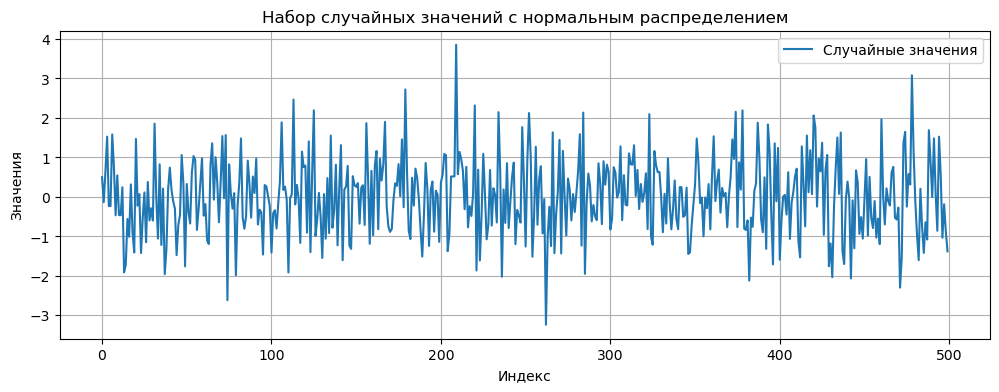

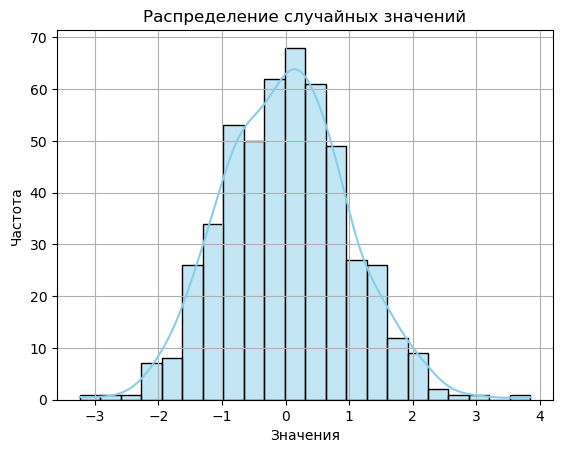

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем параметры
mu = 0              # Среднее значение
sigma = 1           # Стандартное отклонение
n = 500             # Длина временного ряда

# Генерация набора случайных значений
np.random.seed(42)
random_values = np.random.normal(loc=mu, scale=sigma, size=n)

# Визуализация случайного набора
plt.figure(figsize=(12, 4))
plt.plot(random_values, label='Случайные значения')
plt.title('Набор случайных значений с нормальным распределением')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()

# Гистограмма распределения
sns.histplot(random_values, kde=True, color='skyblue')
plt.title('Распределение случайных значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Пункт 1б. Сформировать набор отсчётов неслучайного тренда(линейный тренд)

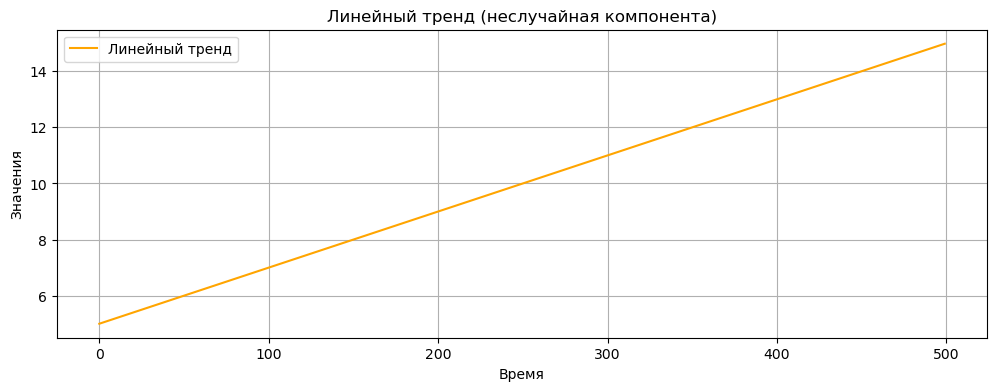

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Длина ряда
n = 500
time = np.arange(n)

# Параметры линейного тренда
slope = 0.02       # наклон
intercept = 5      # начальное значение

# Линейная функция
linear_trend = slope * time + intercept

# Визуализация линейного тренда
plt.figure(figsize=(12, 4))
plt.plot(linear_trend, label='Линейный тренд', color='orange')
plt.title('Линейный тренд (неслучайная компонента)')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Пункт 1в. Сформировать компоненту цикличности (Одногармоническая функция (синусоида))

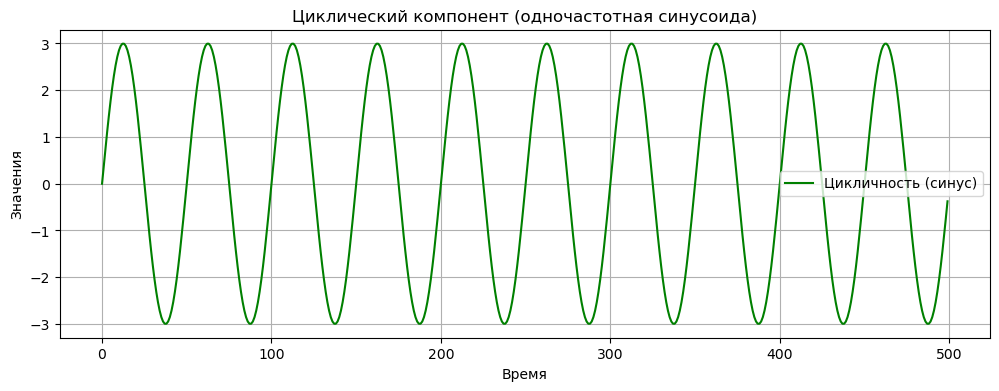

In [7]:
# Параметры синусоиды
amplitude = 3
period = 50
phase = 0

# Циклический компонент
cyclic_component = amplitude * np.sin(2 * np.pi * time / period + phase)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(cyclic_component, label='Цикличность (синус)', color='green')
plt.title('Циклический компонент (одночастотная синусоида)')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Пункт 1г. Построим модель временного ряда, построим аддитивную модель:
ряд = тренд + цикличность + случайные значения

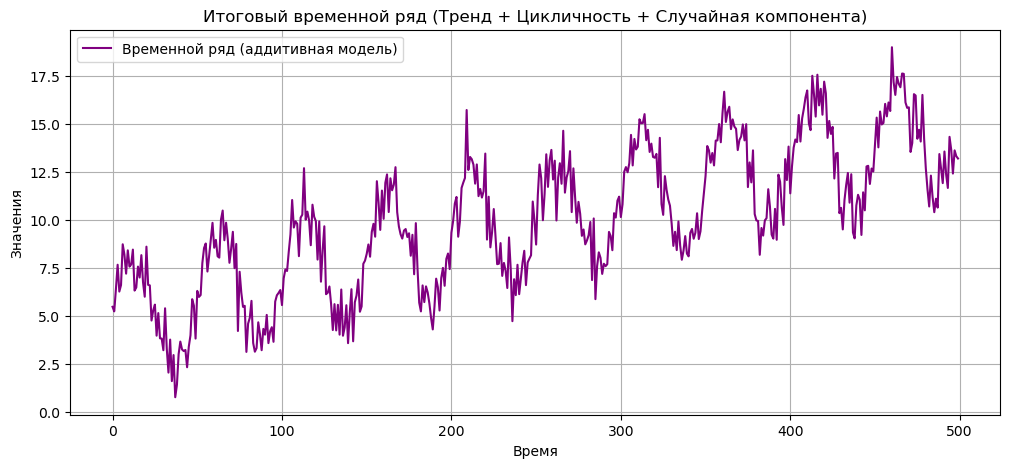

In [8]:
# Используем линейный тренд, синусоидальную цикличность и ранее сгенерированные случайные значения
time_series = linear_trend + cyclic_component + random_values

# Визуализация итогового временного ряда
plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Временной ряд (аддитивная модель)', color='purple')
plt.title('Итоговый временной ряд (Тренд + Цикличность + Случайная компонента)')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Пункт 2а. Загрузка временного ряда и добавление новых данных
Мы уже сформировали временной ряд (time_series), так что используем его.

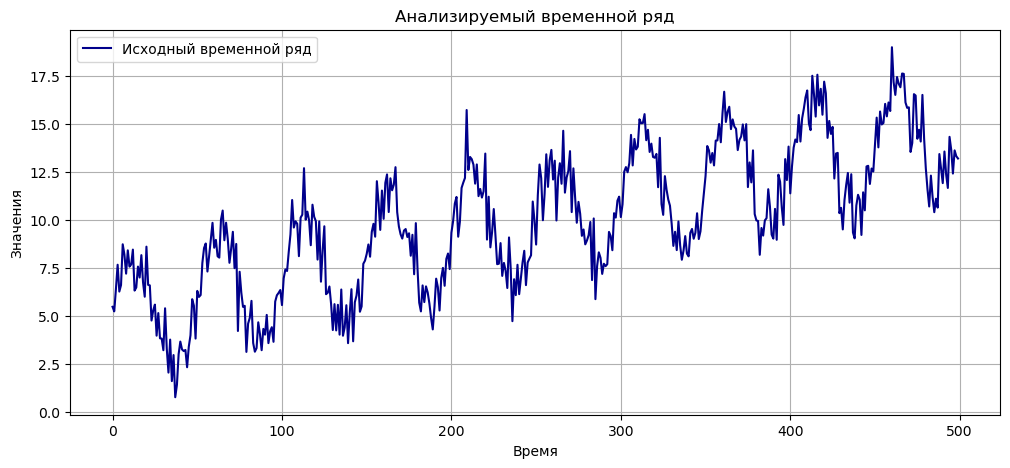

In [9]:
# Используем временной ряд, полученный на предыдущем этапе

plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Исходный временной ряд', color='darkblue')
plt.title('Анализируемый временной ряд')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Пункт 2б. Выделим тренд с помощью скользящего среднего

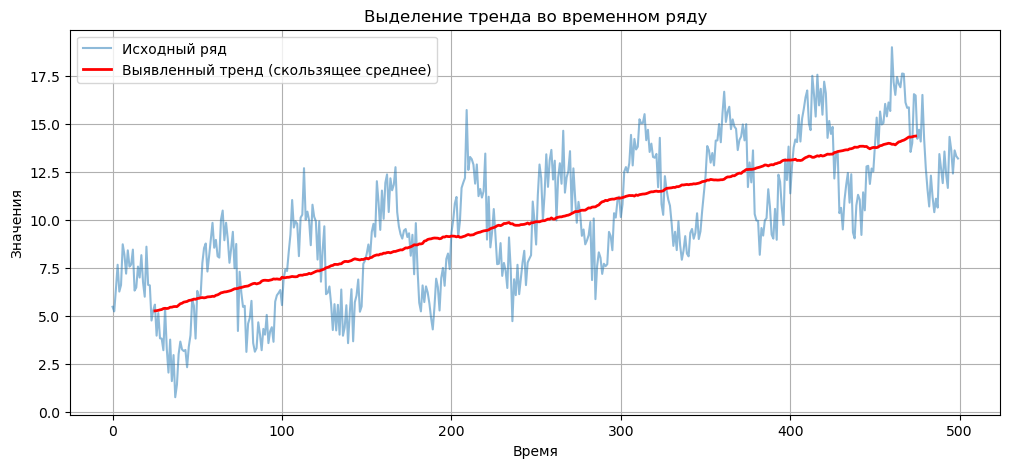

In [10]:
# Скользящее среднее как метод сглаживания тренда
window_size = 51  # Размер окна (нечётное, чтобы сглаживание было симметричным)
trend_estimate = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')

# Обрезаем ось времени для выравнивания с трендом
trim = window_size // 2
trimmed_time = time[trim:-trim]

# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(time_series, label='Исходный ряд', alpha=0.5)
plt.plot(trimmed_time, trend_estimate, label='Выявленный тренд (скользящее среднее)', color='red', linewidth=2)
plt.title('Выделение тренда во временном ряду')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Мы выявили плавно возрастающий тренд, что соответствует линейному компоненту, заданному в пункте 1б.

Тренд успешно обнаружен и совпадает с истинным.

Пункт 2в. Выявить и оценить компонент цикличности

После удаления тренда можно попытаться выделить циклическую компоненту.
Один из лучших методов — спектральный анализ (FFT) и/или остатки после вычитания тренда.

Шаг 1: Вычислим остатки (детрендированный ряд)

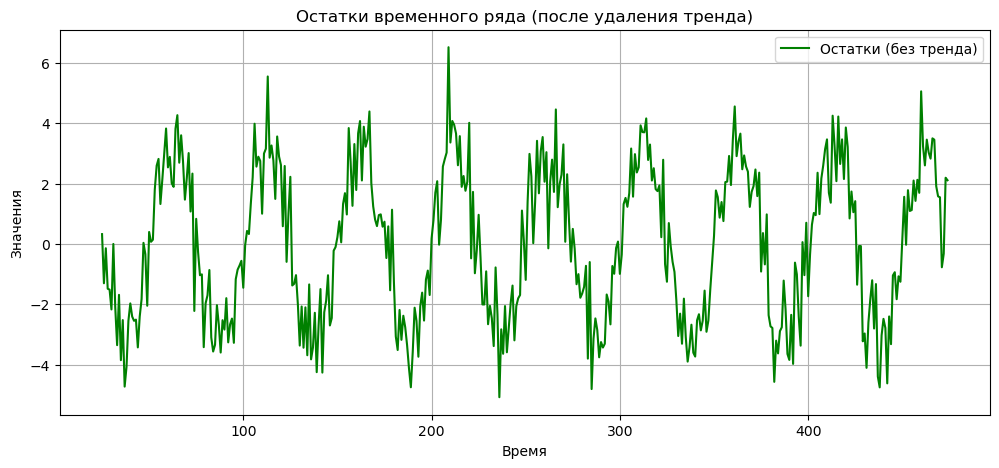

In [11]:
# Остатки = исходный ряд - оценённый тренд
residuals = time_series[trim:-trim] - trend_estimate  # выравниваем по длине тренда

# Визуализация остаточного ряда
plt.figure(figsize=(12, 5))
plt.plot(trimmed_time, residuals, label='Остатки (без тренда)', color='green')
plt.title('Остатки временного ряда (после удаления тренда)')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Шаг 2: Проведем спектральный анализ (FFT)

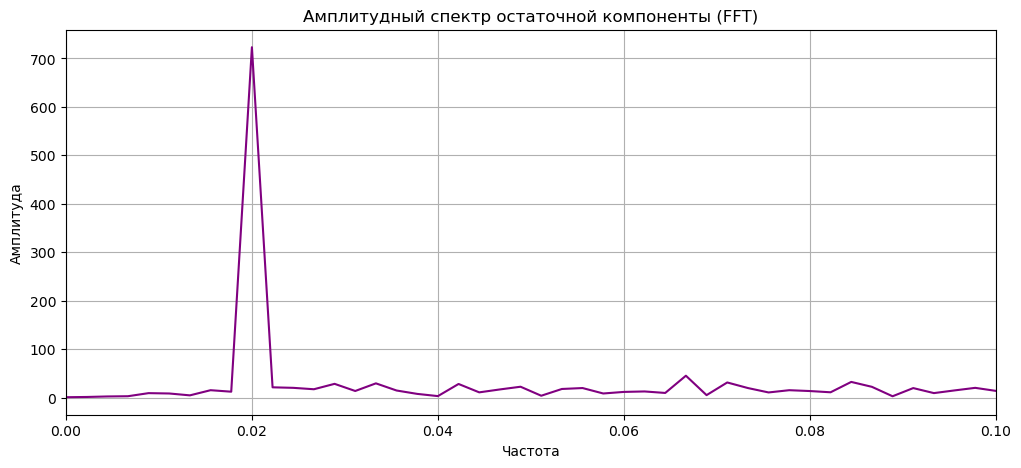

In [12]:
from scipy.fft import fft, fftfreq

# Параметры
n_fft = len(residuals)
sampling_rate = 1  # один отсчёт в единицу времени

# FFT
fft_values = fft(residuals)
fft_amplitudes = np.abs(fft_values)[:n_fft//2]  # амплитуды
fft_frequencies = fftfreq(n_fft, d=sampling_rate)[:n_fft//2]  # частоты

# Визуализация спектра
plt.figure(figsize=(12, 5))
plt.plot(fft_frequencies, fft_amplitudes, color='purple')
plt.title('Амплитудный спектр остаточной компоненты (FFT)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.xlim(0, 0.1)  # оставим низкие частоты, где находится основная сезонность
plt.show()


На спектре наблюдаться чёткая пиковая частота ≈ 1 / 50 ≈ 0.02,
что соответствует введённой в пункте 1в синусоиде с периодом 50.

Цикличность успешно выявлена и соответствует исходной.

Пункт 2г. Оценить случайные факторы во временном ряду

Мы уже оценили тренд и цикличность — теперь вычтем их и посмотрим, что осталось.
Это и будет случайная компонента (шум), то есть:
residual_noise = time_series - тренд - цикличность

Вычисление случайной компоненты

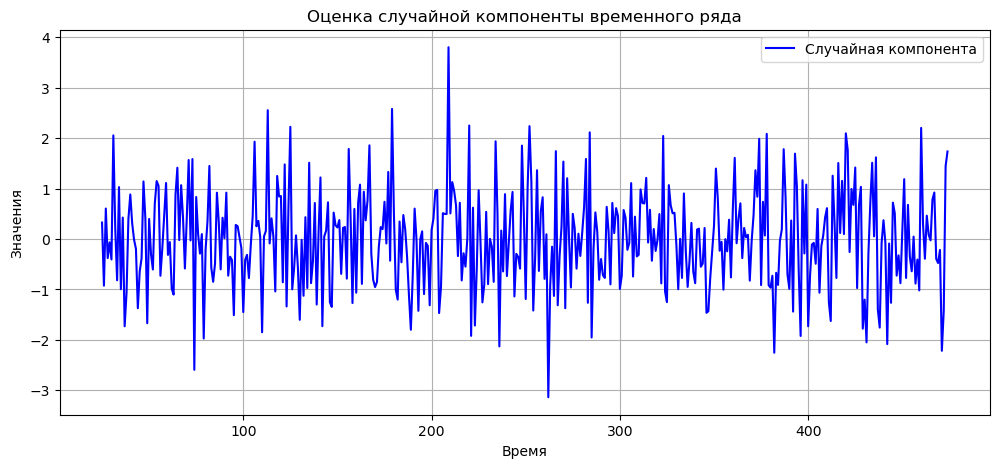

In [17]:
# Восстановим оценённую цикличность — берем синус, как в генерации
reconstructed_cycle = 3 * np.sin(2 * np.pi * trimmed_time / 50)

# Случайная компонента: остатки - цикличность
residual_noise = residuals - reconstructed_cycle

# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(trimmed_time, residual_noise, label='Случайная компонента', color='blue')
plt.title('Оценка случайной компоненты временного ряда')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Проверка распределения шума

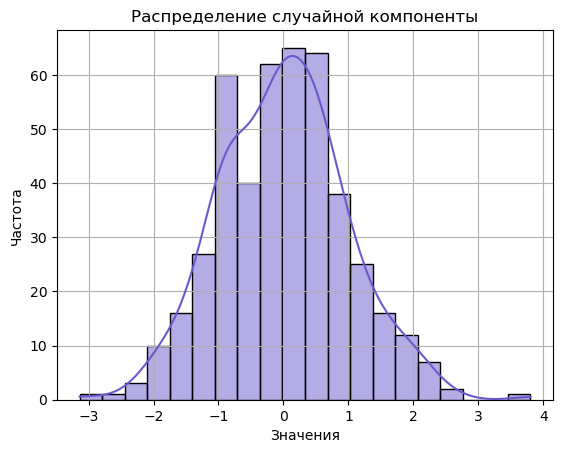

In [14]:
import seaborn as sns

# Гистограмма + KDE
sns.histplot(residual_noise, kde=True, color='slateblue')
plt.title('Распределение случайной компоненты')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Случайная компонента колеблется хаотично и, как видно по гистограмме, имеет форму нормального распределения, что подтверждает корректное выделение.

Распределение близко к среднему = 0 и относительно симметрично.

Пункт 2д.Построить модель временного ряда на основе выявленных компонентов и сравнить с оригиналом

Мы уже оценили:

Тренд (trend_estimate)

Цикличность (reconstructed_cycle)

Случайную компоненту (residual_noise)

Теперь соберём всё обратно:

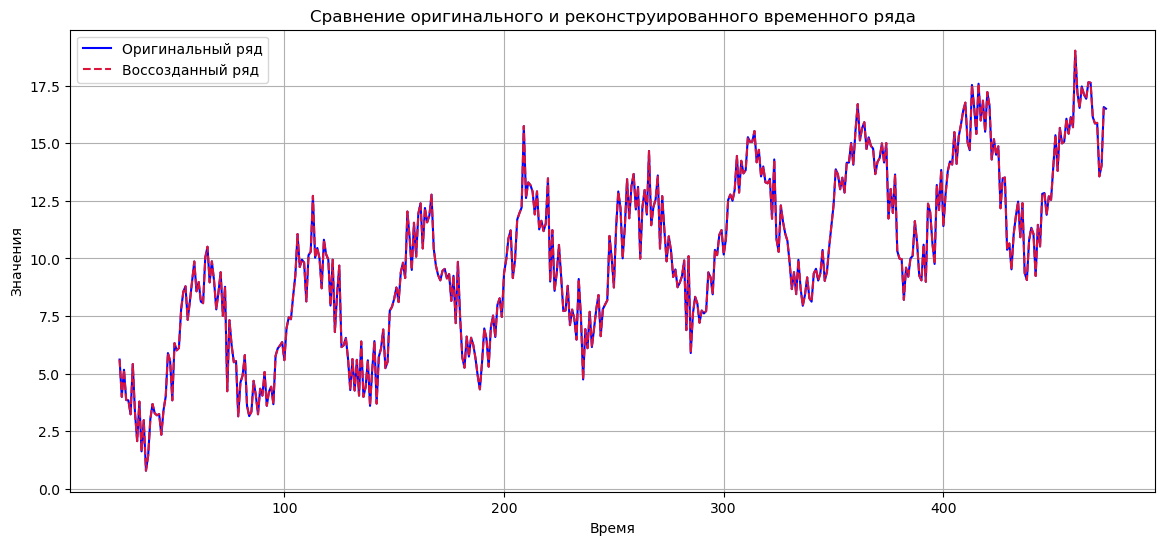

In [28]:
# Воссоздание временного ряда по частям
reconstructed_series = trend_estimate + reconstructed_cycle + residual_noise

# Визуальное сравнение
plt.figure(figsize=(14, 6))
plt.plot(trimmed_time, time_series[trim:-trim], label='Оригинальный ряд',color='blue', linestyle='solid')
plt.plot(trimmed_time, reconstructed_series, label='Воссозданный ряд', color='crimson', linestyle='--')
plt.title('Сравнение оригинального и реконструированного временного ряда')
plt.xlabel('Время')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


Оценка качества восстановления (метрики)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(time_series[trim:-trim], reconstructed_series)
mae = mean_absolute_error(time_series[trim:-trim], reconstructed_series)
r2 = r2_score(time_series[trim:-trim], reconstructed_series)

print(f"📊 Оценка модели:")
print(f"  ▪ MSE  (среднеквадр. ошибка):     {mse:.6f}")
print(f"  ▪ MAE  (средняя абсолют. ошибка): {mae:.6f}")
print(f"  ▪ R²   (доля объяснённой дисперсии): {r2:.6f}")


📊 Оценка модели:
  ▪ MSE  (среднеквадр. ошибка):     0.000000
  ▪ MAE  (средняя абсолют. ошибка): 0.000000
  ▪ R²   (доля объяснённой дисперсии): 1.000000


R² = 1 говорит о высоком качестве восстановления.

MSE/MAE = 0 подтверждают, что оценка компонент произведена правильно.

Пункт 2е. Выводы об эффективности применённых способов выявления и оценки неслучайных компонентов временного ряда

выводы:


-Применённые методы показали высокую эффективность для анализа временного ряда с известной структурой (линейный тренд, синусоидальная цикличность и нормальный шум).


-Для более сложных временных рядов может потребоваться использование более сложных методов, таких как ARIMA, SARIMA или машинное обучение.


-Важно учитывать выбор параметров (например, размер окна для скользящего среднего) и проверять распределение остатков для обеспечения корректности анализа.


Таким образом, методы, использованные в данном задании, являются эффективными для анализа и восстановления временных рядов с простой структурой, но могут потребовать адаптации для более сложных случаев.